In [31]:
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import itertools

In [42]:
def generate_hpf(bins,simple=True):
    """  Hartmann production function (differential distribution)
    from New Views of the Moon (2006) p. 548
    
    inputs:
    -------
    bins: listlike or arraylike, bins should be logarithmic in base 2 
        production function will be generated as a function of left bin edge
        
    simple: boolean, default = True
        if True, assumes the central (original) power-law applies everywhere
        if False, computes a piecewise function
    """
    
    log_hpf = np.zeros(len(bins)-1)
    
    for i,Dleft in enumerate(bins[:-1]):
        Dright = bins[i+1]
        
        if (simple==False) and (Dleft<=1.41):
            log_hpf[i] = -2.616 - 3.82 * np.log10(Dleft)
        elif (simple==True) or ((Dleft>1.41) and (Dleft<=64)):
            log_hpf[i] = -2.920 - 1.80 * np.log10(Dleft)
        elif (simple==False) and (Dleft>64):
            log_hpf[i] = -2.198 - 2.20 * np.log10(Dleft)
        else:
            print "WTF", Dleft
            
    return log_hpf

In [5]:
# logarithmic bins in base2
bins = np.append(np.logspace(1,7,25,base=2),140)

In [6]:
log_hpf = generate_hpf(bins)
hpf = 10**log_hpf
print hpf

[  3.45259795e-04   2.52744963e-04   1.85020143e-04   1.35442672e-04
   9.91498395e-05   7.25819309e-05   5.31330834e-05   3.88956937e-05
   2.84733144e-05   2.08436862e-05   1.52584714e-05   1.11698548e-05
   8.17681235e-06   5.98577700e-06   4.38184524e-06   3.20769847e-06
   2.34817272e-06   1.71896305e-06   1.25835461e-06   9.21169489e-07
   6.74335536e-07   4.93642506e-07   3.61367466e-07   2.64536469e-07
   1.93652030e-07]


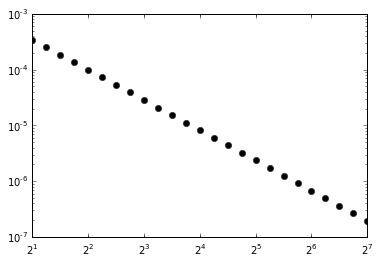

In [7]:
plt.plot(bins[:-1],hpf,'ko')
plt.xscale("log",basex=2)
plt.yscale("log")

OK, I'm scaling kind of by eye from the plot I have from Marcel's lab. 

In [8]:
ages = [3.0,3.5,3.7,4.0] # Gyr
scale_diams = [64,64,4,16] # km
scale_N = [0.6,1,700,300] # craters per 10^6 square km
scale_locs = [np.where(bins==diam)[0][0] for diam in scale_diams]
hpf_to_scale = hpf[scale_locs]
scales = scale_N / hpf_to_scale

In [9]:
print scales

[   889764.76503581   1482941.27505969   7060021.51278749
  36689113.94349191]


In [21]:
def setup_axes(ax):
    ax.set_xscale("log",basex=2)
    ax.set_yscale("log")
    ax.set_xlim(2,128)
    ax.set_ylim(0.1,1000)
    ax.set_yticklabels([0.1,1,10,100,1000])
    ax.set_xticklabels([1,2,4,8,16,32,64,128])
    ax.set_xticks([3,6,12,24,32,48,64,96],minor=True)
    ax.tick_params(labelsize="large")
    ax.grid(which='minor',axis='y')
    ax.grid(which='major',axis='x',linestyle="-",color="k")
    ax.set_ylabel("Craters per 1,000,000 square km",fontsize="x-large")
    ax.set_xlabel("Crater Diameter (km)",fontsize="x-large")

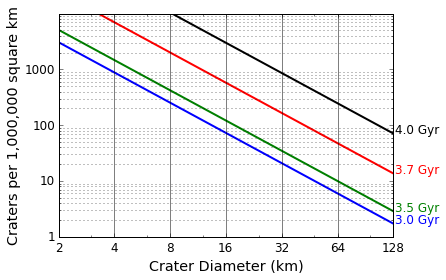

In [26]:
def plot_isochrons(ax):
    colors=["b","g","r","k"]
    for i,age in enumerate(ages):
        plt.plot(bins[:-1],hpf*scales[i],color=colors[i],lw=2)
        plt.text(130,hpf[-1]*scales[i],"{:.1f} Gyr".format(age),color=colors[i],fontsize="large")
    setup_axes(ax)
ax = plt.subplot(111)
plot_isochrons(ax)

The plot above shows crater density as a function of size. Craters in a certain bin are counted and then the density is scaled from the source image to craters per 10^6 km^2.

A surface's age means how long ago it was last wiped clean (re-surfaced), typically by lava flows although a massive impact can also wipe a region relatively clean. The four calibration lines above show the ages of different lunar surfaces for which we have radiometric isotope data from the Apollo missions.  The rapid increase in crater density between 4-3.5 Gyr ago indicates the late heavy bombardment.  Cratering rapidly slo

[ 743.17668169  669.89091461  556.92297844  485.42446596  405.95274954
  325.92216856  349.16288849  287.98602857  239.26353908  212.61613164
   67.47624737   39.91700537   40.03383993   33.08616414   21.91442052
   15.37333592   10.46386126    4.11026085    4.61818155    5.82713183
    3.72170775    3.98978336    1.36238103    3.30130871    1.76900621]


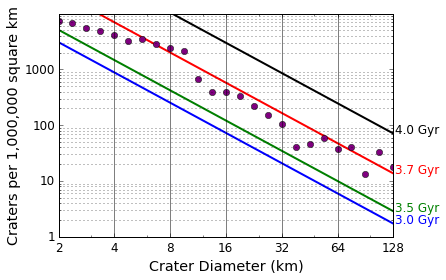

In [36]:
ax = plt.subplot(111)
plot_isochrons(ax)
x = bins[:-1]
test_hpf = hpf*scales[2]*0.75
test_hpf[:10] *= (x[:10]/5.)
#test_hpf[20:] *= 2.1
test_hpf += np.random.normal(0.0,scale=np.sqrt(test_hpf),size=len(hpf))
print test_hpf
plt.plot(x,test_hpf,'o',color='purple')

In [39]:
test_errs0 = np.random.poisson(lam=np.sqrt(test_hpf),size=len(hpf))
test_errs0[:10] += np.random.normal(0.0,scale=100,size=10)
test_errs0[10:17] += np.random.normal(0.0,scale=10,size=7)
up_errs = abs(test_errs0)
bad_dn = np.where((test_hpf-test_errs0)<=0)[0]
dn_errs = abs(test_errs0)
dn_errs[bad_dn] = test_hpf[bad_dn] - 0.0001
test_errs = np.array([dn_errs,up_errs])
print test_errs

[[207 135  93 182  25 106 131  77 206 122   6   1  22  11  11   9   8   4
    2   0   3   1   1   3   1]
 [207 135  93 182  25 106 131  77 206 122   6   1  22  11  11   9   8   5
    2   0   4   1   1   3   3]]


<Container object of 3 artists>

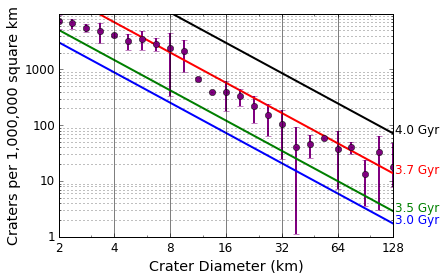

In [40]:
ax = plt.subplot(111)
plot_isochrons(ax)
plt.errorbar(x,test_hpf,test_errs,fmt='o',color='purple',elinewidth=2)

In [41]:
f = open("crater_data.csv","w")
f.write("Diam(km),count_per_million_km,count_error")
for bb,count,count_err in itertools.izip(bins[:-1],test_hpf,test_errs[1]):
    f.write("\n{0:.2f},{1:.0f},{2}".format(bb,count,count_err))
f.close()